In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [46]:
n = 10
A = np.eye(n)*np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [62]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)

In [48]:
def a_next(ak, L):
    return 1 / L * 0.5 + (1 / L**2 * 0.25 + ak**2)**0.5

In [49]:
def y_next(ak_next, uk, a_bigk, xk):
    return (ak_next * uk + a_bigk * xk) / (a_bigk + ak_next)

In [57]:
def u_next(uk, grad, ak_next, yk_next):
    return uk - ak_next * grad(yk_next)

In [51]:
#def func_f(func_f_prev, ak_next, yk_next, x):
#    return func_f_prev + ak_next * (func(yk_next) + grad(yk_next).T @ (x - yk_next))

In [52]:
def fast_grad_step_v3(ak_next, uk_next, a_bigk, xk):
    return (ak_next * uk_next + a_bigk * xk) / (a_bigk + ak_next)

In [63]:
xk = x0
yk = x0
uk = x0
L = max(np.linalg.eigh(A.T @ A)[0])
ak = 1 / L
a_bigk = ax
res = [func(xk)]
while True:
    ak = a_next(ak, L)
    yk = y_next(ak, uk, a_bigk, xk)
    uk = u_next(uk, grad, ak, yk)
    xk = fast_grad_step_v3(ak, uk, a_bigk, xk)
    a_bigk += ak
    res.append(func(xk))
    if abs(res[-1] - res[-2]) < 1e-6:
        break

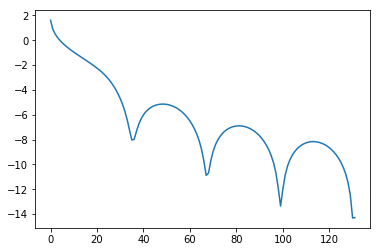

In [67]:
plt.plot(np.log(res))
plt.show()